<a href="https://colab.research.google.com/github/HariniMS/-Arithmetic-Operations-python/blob/master/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Youtube Link**:
 
 https://www.youtube.com/watch?v=rROyz_hZjKQ&t=1749s 

# **Problem Statement :**



Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

# Importing the dataset (using Pandas)

In [ ]:
# intsallig the pandas
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/Mobile Price Prediction/train.csv") 
   
data_train   

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


### 2000 rows & 21 columns

#### price_range is the Target variable/column

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/Mobile Price Prediction/test.csv") 
   
data_test 

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [ ]:
data_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
data_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

#**Exploratory Data Analysis** 


- to analyse the distribution of the data 

OR 
- to understand what data conveys

In [ ]:
#checking the number of rows and columns  

data_train.shape  #there are 2000 rows and 21 columns

(2000, 21)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

##### There are 2000 rows( 0 to 1999) and 21 columns  - 2000 are values(all are non null values) and 21 are column names.  
  ##### If there are less number of null values, remove it

#### data types are float64 for 2 columns (clock_speed and m_dep), int64 for the remaining columns

In [ ]:
data_test.shape

(1000, 21)

In [ ]:
data_test.info() # we can also check the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
#another method to check null values 

data_train.isnull()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
# to show the statistics 

data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


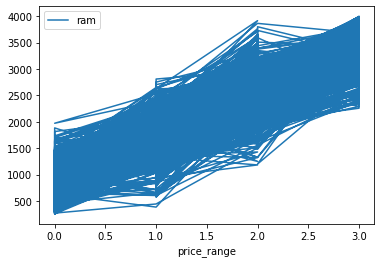

In [ ]:
#visulaizations (plots)  

data_train.plot(x="price_range", y="ram")  #is RAM affecting Price_range or not & How much?
plt.show()

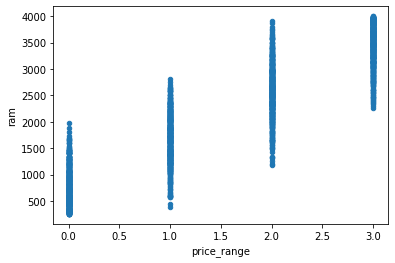

In [ ]:
data_train.plot(x="price_range", y="ram", kind="scatter") 

Ram increases the mobile price range

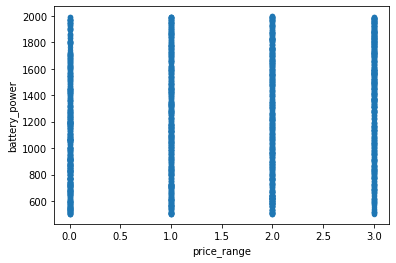

In [ ]:
data_train.plot(x="price_range", y="battery_power", kind = "scatter")

battery power is not affecting mobile price

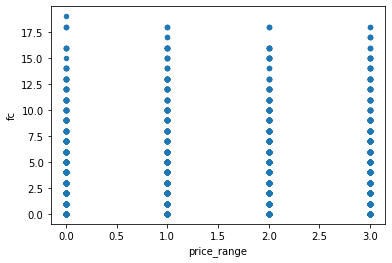

In [ ]:
data_train.plot(x="price_range", y="fc", kind = "scatter")

fc-front camera is not affecting price

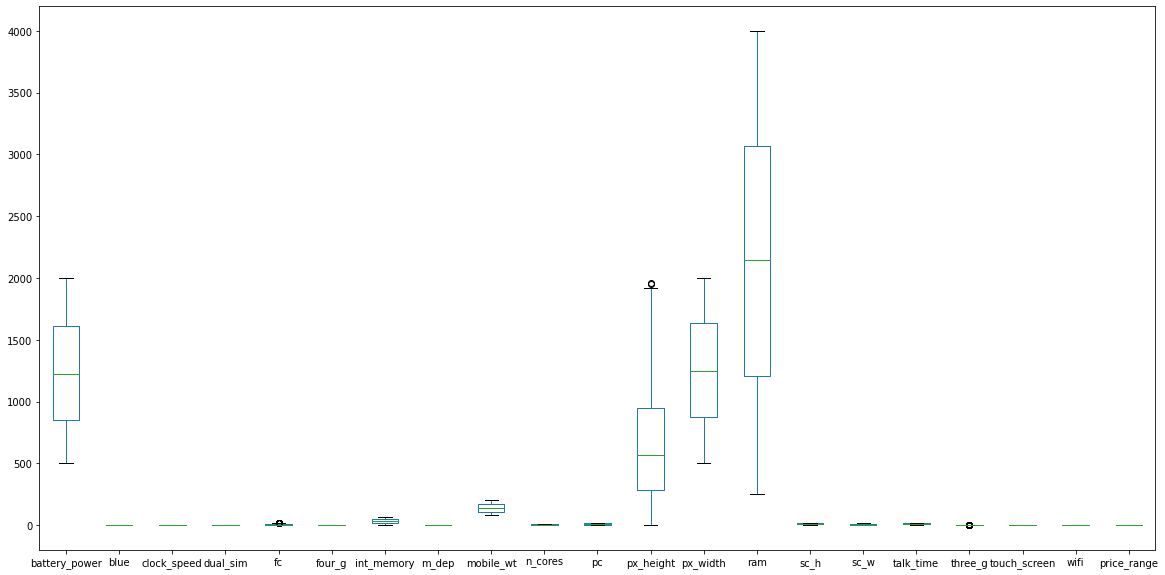

In [ ]:
# checking the outliers-using BOXPLOT  


data_train.plot(kind="box", figsize=(20,10))

#### **Drop the target column and assign to seperate variable:**

In [ ]:
data_train.columns  #target is "price_range" column

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
X = data_train.drop("price_range", axis = 1)  # X don't contain Target 
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
Y = data_train["price_range"]  # Y contains Target column , 0 - low price, 1 -  , 2- mid price  , 3- high price
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

#### **Before Training the Data, Scale the data(Normalization) as the data/values are in different range, we can do this by using Standard Scaler method(Mean = 0, Std Deviation=1) .**

eg: check data_train, in that battery_power column - 1st row with a value 842, 2nd value is 1021, 3rd is 563, 4t is 615 etc etc.... again last value is 510. There is huge difference for each two values. 


**Standard Scaler:** 


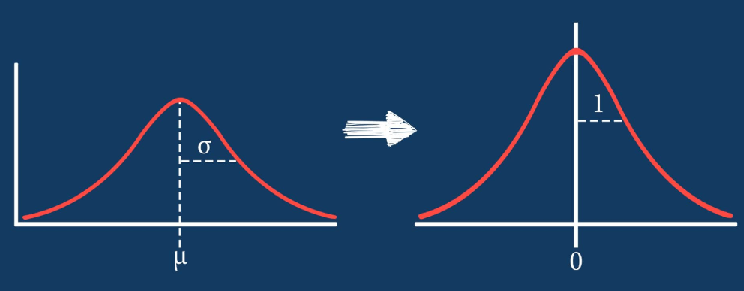

After applying Standard Scaler, When we check Data_train.describe(), the MEAN will be in 0 Range & STD will be in 1 Range 

Install the scikit-learn to apply Std Scaler method/function

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler 
std = StandardScaler() #stored in std

Now, Scale the both Train and Test Data

In [ ]:
X_std = std.fit_transform(X)

data_test_std = std.transform(data_test)  # error, X has 21 columns, data_test have 20 columns

ValueError: ignored

fit_transform()  -->> Analyses the the data X(without target,here its X). and transforms the data.  

transform(test-data) -->>  On the basis of how it analysed the data( from fit_transform() ),it will only transforms the test data.                        
i.e. it scans only the columns in the test data which already scaned those columns of train data without Target.  


Means it compares both the columns of test (with target)and train (without target).



In [ ]:
data_train.shape

In [ ]:
data_test.shape

In [ ]:
X.shape

In [ ]:
X.columns

In [ ]:
data_test.columns

##### Dropping id from data_test :


In [ ]:
data_test = data_test.drop("id", axis=1, inplace = True ) #inplace = True, removing the ID column permanently , don't use this command

data_test

In [ ]:
data_test.columns

In [ ]:
data_test = data_test.drop("id", axis=1) 

data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [ ]:
data_test.columns  #id dropped

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
## Scale the train & Test Data 
 
X_std = std.fit_transform(X)

data_test_std = std.transform(data_test)

###### Train data

In [ ]:
X_std  #after scaling

In [ ]:
X  #before scaling

###### Test Data

In [ ]:
data_test #before scaling 

In [ ]:
data_test_std  #after scaling

# Training the Model

#1. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_std, Y) #training the model, X_std = applied std scaler(training data),  
                 # Y= without std scaler, contailns only Target column(training data's label --> target)

In [ ]:
  dt.predict(data_test_std)  #testing, applied std scaler

In [ ]:
data_test #before scaling

In [ ]:
data_test_std #after scaling

Accuarcy/Score :

In [ ]:
dt.score(X_std, Y)   # showing 100% accurate

# 2. KNN : Is the STAR belongs to Yellow class or purple class? 

Star is near to purple class. If K=3 , then star near to one yellow and 2 purple class. but take the majority of the class(numb of points near to it). so it belongs to purple ones - CLASS B. 

If K=6, Start belongs to "Class A" - yellow class (4 rounds are nearer) as purple rounds are only 2 which are also near to star.

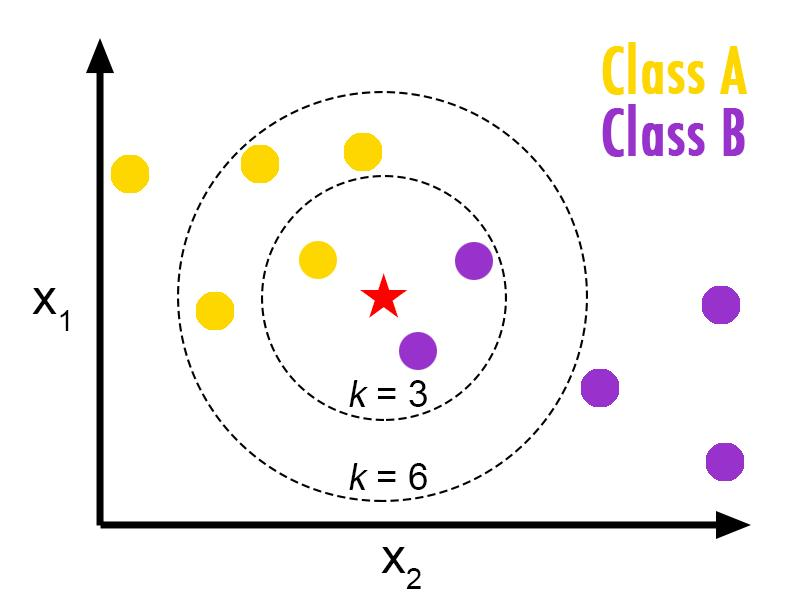

### Using "HYPER PARAMETER" , we can know on what K = ____ , our model is performing better.

In [ ]:
#importing KNN 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
# Training 

knn.fit(X_std, Y)

In [ ]:
#Testing 

knn.predict(data_test_std)

In [ ]:
data_test_std

In [ ]:
data_test

In [ ]:
data_test.columns

In [ ]:
data_test_std.columns

In [ ]:
Y

In [ ]:
Y.values

# 3. Logistic regression : Its a classification

In [ ]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()

In [ ]:
lr.fit(X_std, Y)

In [ ]:
lr.predict(data_test_std)

# Using only Train.csv with train_test_split function

In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/Mobile Price Prediction/train.csv") 
   
data_train  

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
X = data_train.drop("price_range", axis = 1)  # X don't contain Target 
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
Y = data_train["price_range"]  # Y contains Target column , 0 - low price, 1 -  , 2- mid price  , 3- high price
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [ ]:
 #importing train_test_split  function 
 
 from sklearn.model_selection import train_test_split 


In [ ]:
#divining X into X_train & X_test, Y into Y_train & Y_test 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 ,random_state = None)

In [ ]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1042,1674,0,2.8,1,0,1,52,0.2,89,3,7,1432,1649,2030,7,0,6,1,0,0
1929,1602,0,1.6,1,0,1,35,0.1,99,7,7,1325,1800,1829,18,17,13,1,0,0
440,1310,1,2.3,1,6,0,57,0.9,135,8,9,449,889,1175,16,0,8,0,0,0
1301,1874,1,0.6,0,1,0,19,0.8,192,2,9,1238,1418,1218,15,10,17,0,1,0
703,1413,0,0.5,1,4,1,39,0.1,185,5,12,1039,1318,3878,19,16,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,862,1,0.8,1,3,0,23,0.4,165,2,15,793,1758,278,16,3,11,0,0,1
467,1433,0,1.6,0,7,0,4,0.7,133,8,11,281,799,258,11,9,4,1,1,1
1785,1354,1,0.7,1,3,1,26,0.5,136,4,6,297,918,2090,5,1,13,1,1,0
1228,1820,1,1.7,1,0,1,64,0.6,161,1,3,1157,1951,574,10,2,18,1,1,0


first row no is 175 and second is 1239 etc. 

Now run X_train , we get different columns 



#### Always give some integer number to random_state, If random_state = None, dataset will not be in corect oreder, whwnever we run X_train , X_test or Y_train n test, it considers different columns and it splits(data changes).

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 ,random_state = 1 )

In [ ]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
816,805,1,0.7,0,0,0,64,0.1,97,4,14,641,704,418,11,6,17,0,1,1
790,911,1,2.9,0,0,0,46,0.1,181,5,1,461,670,363,9,5,17,0,1,0
361,899,0,0.5,1,13,1,57,0.9,172,2,18,788,1331,364,11,1,7,1,1,0
592,1263,0,0.5,0,12,0,64,0.3,175,5,18,178,1883,1183,14,3,17,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1203,1,0.5,1,0,1,11,0.9,109,2,12,35,510,1672,17,13,19,1,1,0
1096,1154,0,2.0,0,6,1,35,0.8,159,5,16,1003,1827,3262,16,15,16,1,0,0
1932,718,1,1.6,1,1,1,30,0.4,93,3,12,662,997,1601,10,9,12,1,1,1
235,1523,1,1.8,0,6,1,11,0.1,129,1,8,148,1606,707,19,8,19,1,1,0


1600 rows

In [ ]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
674,1034,0,2.6,1,2,1,45,0.3,190,3,4,182,1293,969,15,1,7,1,0,0
1699,1002,1,1.8,0,1,0,45,0.7,180,7,7,948,1007,1234,19,13,18,1,1,0
1282,609,1,0.5,0,4,1,10,0.1,81,6,6,113,1524,1905,16,3,18,1,1,1
1315,1510,0,0.6,1,1,0,32,0.7,135,3,8,963,1520,854,8,2,10,1,0,1
1210,805,1,1.7,1,0,1,58,0.9,168,3,10,81,1544,3397,7,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1266,0,1.9,1,0,1,7,0.2,184,3,12,346,1468,2532,10,5,4,1,1,1
763,1741,1,1.8,0,0,0,14,0.7,143,8,0,730,1895,3387,11,3,3,1,0,0
385,1880,1,1.8,0,4,1,18,0.7,138,3,5,71,699,3333,17,15,7,1,0,0
1667,1967,0,0.5,0,0,1,46,0.6,199,1,7,518,1374,1567,15,2,7,1,1,0


400 rows

In [ ]:
Y_train

0       1
816     0
790     0
361     0
592     1
       ..
1791    0
1096    3
1932    1
235     0
1061    1
Name: price_range, Length: 1600, dtype: int64

X_train and Y_train row numbes are same,  0,816, 790, etc....

In [ ]:
Y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
400     2
763     3
385     3
1667    1
1820    0
Name: price_range, Length: 400, dtype: int64

X_test and Y_test row numbes are same,  674,1699,1282, etc....

+ **Now, we will train the model by using X_train and Y_train, and we are going to predict on X_test.** 
+ **whatever results will come from X_test, we will compare with original Y_test. Then, only we'll get Accuracy Score** 

# 1. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, Y_train) #training

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
674,1034,0,2.6,1,2,1,45,0.3,190,3,4,182,1293,969,15,1,7,1,0,0
1699,1002,1,1.8,0,1,0,45,0.7,180,7,7,948,1007,1234,19,13,18,1,1,0
1282,609,1,0.5,0,4,1,10,0.1,81,6,6,113,1524,1905,16,3,18,1,1,1
1315,1510,0,0.6,1,1,0,32,0.7,135,3,8,963,1520,854,8,2,10,1,0,1
1210,805,1,1.7,1,0,1,58,0.9,168,3,10,81,1544,3397,7,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1266,0,1.9,1,0,1,7,0.2,184,3,12,346,1468,2532,10,5,4,1,1,1
763,1741,1,1.8,0,0,0,14,0.7,143,8,0,730,1895,3387,11,3,3,1,0,0
385,1880,1,1.8,0,4,1,18,0.7,138,3,5,71,699,3333,17,15,7,1,0,0
1667,1967,0,0.5,0,0,1,46,0.6,199,1,7,518,1374,1567,15,2,7,1,1,0


see 1315 row no

In [ ]:
#testing  

Y_pred = dt.predict(X_test) 
Y_pred

array([0, 0, 1, 0, 3, 2, 1, 1, 1, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 1, 3, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 1, 3, 2, 1,
       0, 1, 3, 2, 1, 3, 0, 3, 3, 1, 2, 1, 1, 0, 0, 3, 1, 2, 3, 2, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 0, 1, 2, 2, 3, 1, 2, 2, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 1, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 1, 2, 2, 1, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 3, 1,
       0, 1, 2, 2, 3, 3, 1, 3, 2, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       3, 2, 1, 1, 2, 0, 3, 3, 3, 1, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 1, 2, 0, 0, 1, 2, 3, 0, 1, 1, 3, 3, 2, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 3, 2,

comparing these values with actual Y_test values.

In [ ]:
Y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
400     2
763     3
385     3
1667    1
1820    0
Name: price_range, Length: 400, dtype: int64

1315 row no. actual price is 1 but model predicted as 0.  

1315 row no from X_test features ---->>>>	1510	0	0.6	1	1	0	32	0.7	135	3	8	963	1520	854	8	2	10	1	0	1   

for these X_tesrt feaures in 1315 row no, The price in Y_test is 1, but model predicted as 0.

## Checking Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
dt_ac = accuracy_score(Y_test, Y_pred) # (acutual y_test, precicted test value(X_test) ) 
dt_ac

0.84

### only 84.5% is correct from the model result, after comparing with Y_test.  (model compared both predicted test values and actual Y_test)

# 2. KNN (distance matters, so do the standrad scalin. For Decision trre Std Scaling is not required)

In [ ]:
from sklearn.preprocessing import StandardScaler 
std = StandardScaler() #stored in std  
  
  
  
## Scale the train & Test Data 
 
X_train_std = std.fit_transform(X_train)

X_test_std = std.transform(X_test) 

In [ ]:
X_train # before scaling

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
816,805,1,0.7,0,0,0,64,0.1,97,4,14,641,704,418,11,6,17,0,1,1
790,911,1,2.9,0,0,0,46,0.1,181,5,1,461,670,363,9,5,17,0,1,0
361,899,0,0.5,1,13,1,57,0.9,172,2,18,788,1331,364,11,1,7,1,1,0
592,1263,0,0.5,0,12,0,64,0.3,175,5,18,178,1883,1183,14,3,17,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,1203,1,0.5,1,0,1,11,0.9,109,2,12,35,510,1672,17,13,19,1,1,0
1096,1154,0,2.0,0,6,1,35,0.8,159,5,16,1003,1827,3262,16,15,16,1,0,0
1932,718,1,1.6,1,1,1,30,0.4,93,3,12,662,997,1601,10,9,12,1,1,1
235,1523,1,1.8,0,6,1,11,0.1,129,1,8,148,1606,707,19,8,19,1,1,0


In [ ]:
X_train_std #after scaling

array([[-0.93181622, -0.99128795,  0.84170801, ..., -1.75545796,
        -1.02020406,  0.98634324],
       [-1.01674706,  1.00878862, -0.99558096, ..., -1.75545796,
         0.98019606,  0.98634324],
       [-0.77343166,  1.00878862,  1.69910954, ..., -1.75545796,
         0.98019606, -1.01384584],
       ...,
       [-1.21644933,  1.00878862,  0.10679242, ...,  0.56965192,
         0.98019606,  0.98634324],
       [ 0.63137047,  1.00878862,  0.35176429, ...,  0.56965192,
         0.98019606, -1.01384584],
       [ 0.62907504,  1.00878862, -0.99558096, ...,  0.56965192,
        -1.02020406,  0.98634324]])

In [ ]:
X_test #before scaling

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
674,1034,0,2.6,1,2,1,45,0.3,190,3,4,182,1293,969,15,1,7,1,0,0
1699,1002,1,1.8,0,1,0,45,0.7,180,7,7,948,1007,1234,19,13,18,1,1,0
1282,609,1,0.5,0,4,1,10,0.1,81,6,6,113,1524,1905,16,3,18,1,1,1
1315,1510,0,0.6,1,1,0,32,0.7,135,3,8,963,1520,854,8,2,10,1,0,1
1210,805,1,1.7,1,0,1,58,0.9,168,3,10,81,1544,3397,7,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1266,0,1.9,1,0,1,7,0.2,184,3,12,346,1468,2532,10,5,4,1,1,1
763,1741,1,1.8,0,0,0,14,0.7,143,8,0,730,1895,3387,11,3,3,1,0,0
385,1880,1,1.8,0,4,1,18,0.7,138,3,5,71,699,3333,17,15,7,1,0,0
1667,1967,0,0.5,0,0,1,46,0.6,199,1,7,518,1374,1567,15,2,7,1,1,0


In [ ]:
X_test_std #after scaling

array([[-0.49109398, -0.99128795,  1.33165174, ...,  0.56965192,
        -1.02020406, -1.01384584],
       [-0.56454768,  1.00878862,  0.35176429, ...,  0.56965192,
         0.98019606, -1.01384584],
       [-1.46665102,  1.00878862, -1.24055283, ...,  0.56965192,
         0.98019606,  0.98634324],
       ...,
       [ 1.45083838,  1.00878862,  0.35176429, ...,  0.56965192,
        -1.02020406, -1.01384584],
       [ 1.65054065, -0.99128795, -1.24055283, ...,  0.56965192,
         0.98019606, -1.01384584],
       [-1.33810703,  1.00878862, -0.99558096, ...,  0.56965192,
        -1.02020406, -1.01384584]])

## We don't need to do scaling to Target variables(Y_train & Y_test)

In [ ]:
#importing KNN 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_std, Y_train) #X_train scaled values, actual Y_train

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Y_pred = knn.predict(X_test_std)   

Y_pred

array([0, 1, 1, 0, 1, 1, 0, 2, 1, 3, 0, 3, 2, 0, 2, 0, 1, 1, 1, 2, 3, 2,
       1, 3, 3, 2, 2, 1, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 1, 1, 0, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 2, 1, 1, 0, 3, 3, 1, 3, 0, 1, 0, 0, 3, 2, 2, 3, 1, 2, 0,
       2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 3, 0, 0, 2, 0, 0, 1, 1, 0,
       0, 3, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 3, 1, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 1, 2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 0, 1, 0, 0, 2, 3, 1, 0,
       0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 3, 0, 3, 2, 3, 2, 1, 0, 1, 0, 1, 3,
       2, 0, 1, 3, 0, 3, 0, 2, 1, 3, 3, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 3,
       2, 0, 3, 2, 0, 3, 2, 1, 2, 0, 0, 2, 1, 2, 2, 0, 3, 0, 1, 0, 1, 1,
       2, 2, 2, 2, 2, 1, 0, 3, 2, 1, 0, 1, 3, 3, 1, 1, 0, 1, 2, 0, 1, 2,
       1, 0, 0, 2, 1, 0, 3, 2, 2, 0, 0, 1, 1, 3, 1, 2, 1, 0, 1, 0, 1, 2,
       2, 2, 2, 0, 1, 0, 3, 0, 0, 2, 2, 3, 0, 2, 1, 2, 3, 1, 1, 0, 2, 1,
       1, 2, 0, 0, 1, 3, 1, 3, 0, 0, 2, 3, 3, 3, 0,

In [ ]:
Y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
400     2
763     3
385     3
1667    1
1820    0
Name: price_range, Length: 400, dtype: int64

compare Y_pred and Y_test, 1699 row changed from 0--> 1, 1315 row no changed from 1 --> 0

#### Lets check the Accuracy Score

In [ ]:
knn_ac = accuracy_score(Y_test, Y_pred) 
knn_ac

0.5225

only 52% model gave correct answer, so it performed badly

# 3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_std, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_pred = lr.predict(X_test_std) 
Y_pred

array([0, 0, 1, 1, 2, 2, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 1, 3, 3,
       1, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 0, 2, 0, 3, 2, 1,
       1, 2, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 2, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2,
       0, 3, 3, 0, 3, 2, 2, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 1, 3, 3, 1, 1,
       0, 2, 1, 0, 3, 1, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3, 1, 2, 1, 2, 3, 2, 2, 0, 1, 1, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 3, 2, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 0, 3, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 3, 2, 3, 2,
       2, 1, 0, 1, 3, 0, 3, 3, 3, 1, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 3, 3, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 2,

In [ ]:
Y_test

674     0
1699    0
1282    1
1315    1
1210    2
       ..
400     2
763     3
385     3
1667    1
1820    0
Name: price_range, Length: 400, dtype: int64

after comparing, most of the Y_pred values are correct when compared to Y_test

In [ ]:
lr_ac = accuracy_score(Y_test, Y_pred ) 
lr_ac

0.96

Model gave 96% accuarate result

# For this project, Logistic regression gave best accuracy 

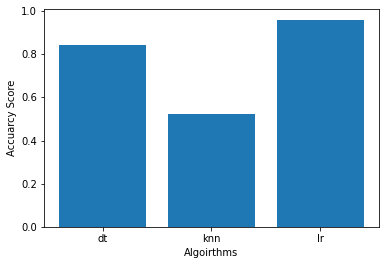

In [ ]:
plt.bar(x = ["dt", "knn", "lr"],  height = [dt_ac, knn_ac, lr_ac]) 
plt.xlabel("Algoirthms") 
plt.ylabel("Accuarcy Score") 

plt.show() 

In [ ]:
X_test = [( 660,	0,	0.9,	0,	0,	1,	31,	0.1,	185,	5,	2,	496,	1804,	690,	5,	2,	15,	1,	0,	0 )]  

Y_pred_new = dt.predict(X_test)
print(Y_pred_new)

[0]
